![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
df = penguins_df.copy()
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
# Checking for missing data
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [3]:
# The sex column needs to be encoded
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


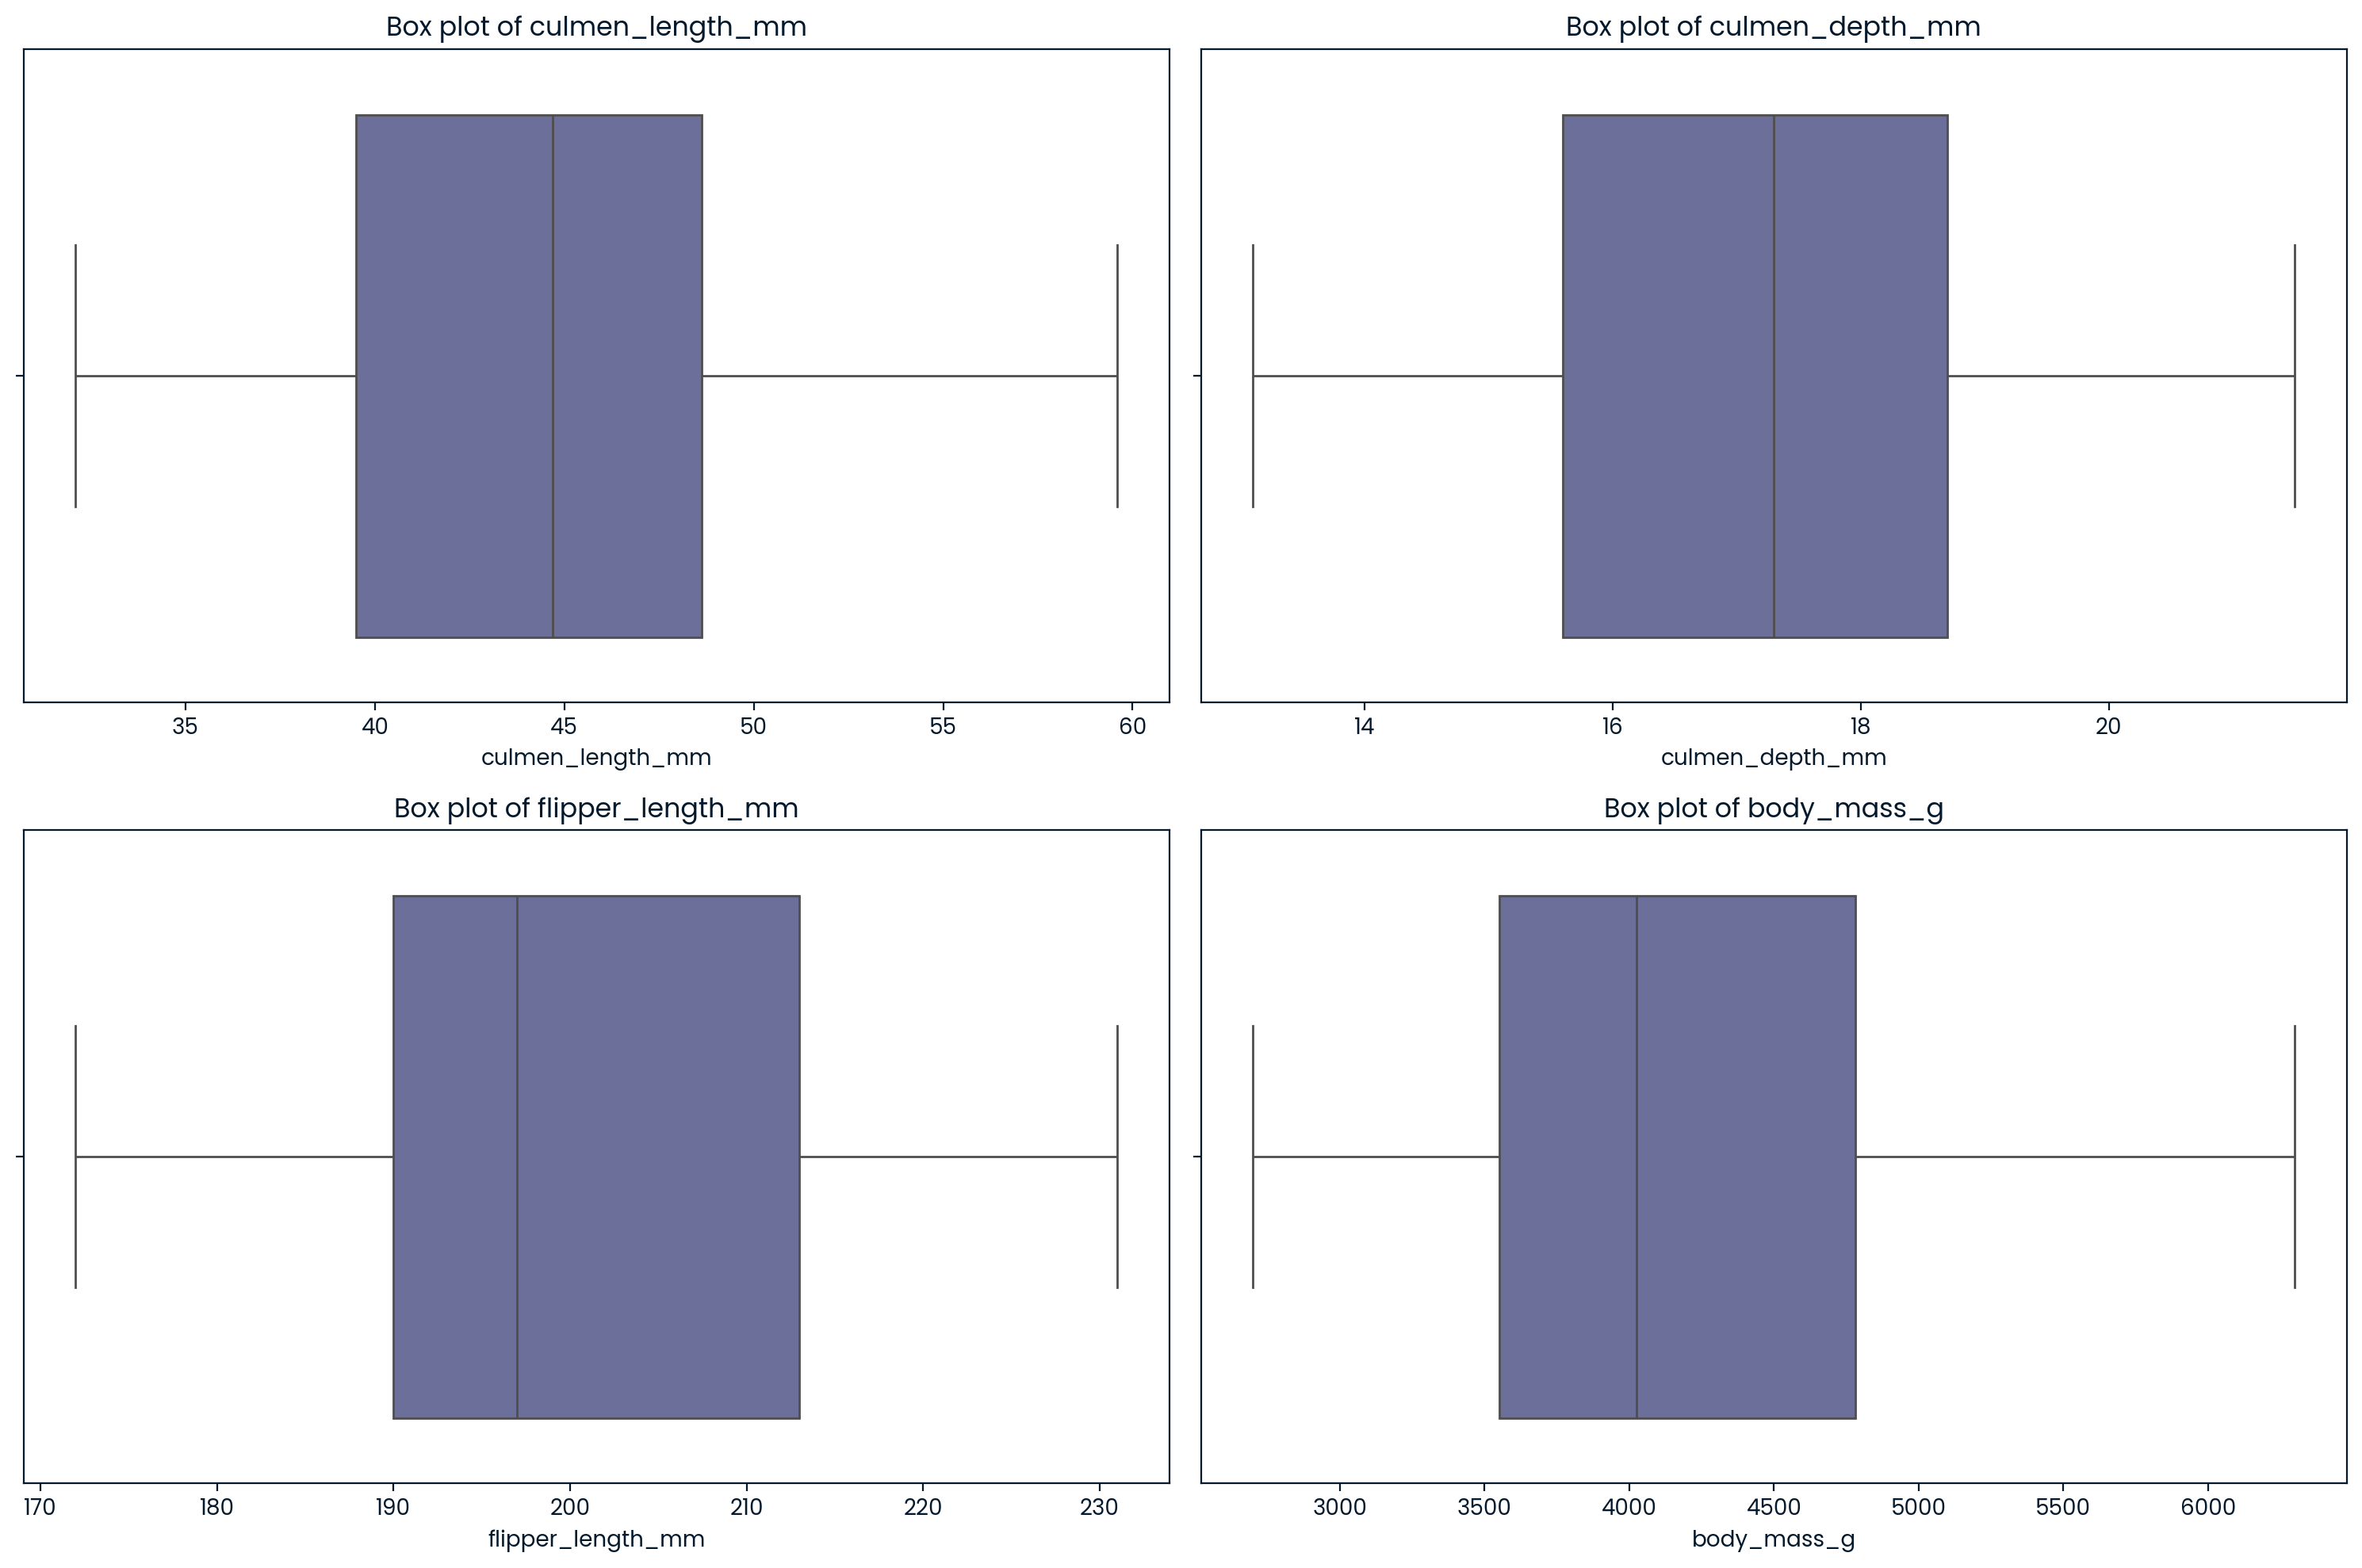

In [4]:
# Checking for outliers using box plots
plt.figure(figsize=(15, 10))

# List of columns to check for outliers
columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

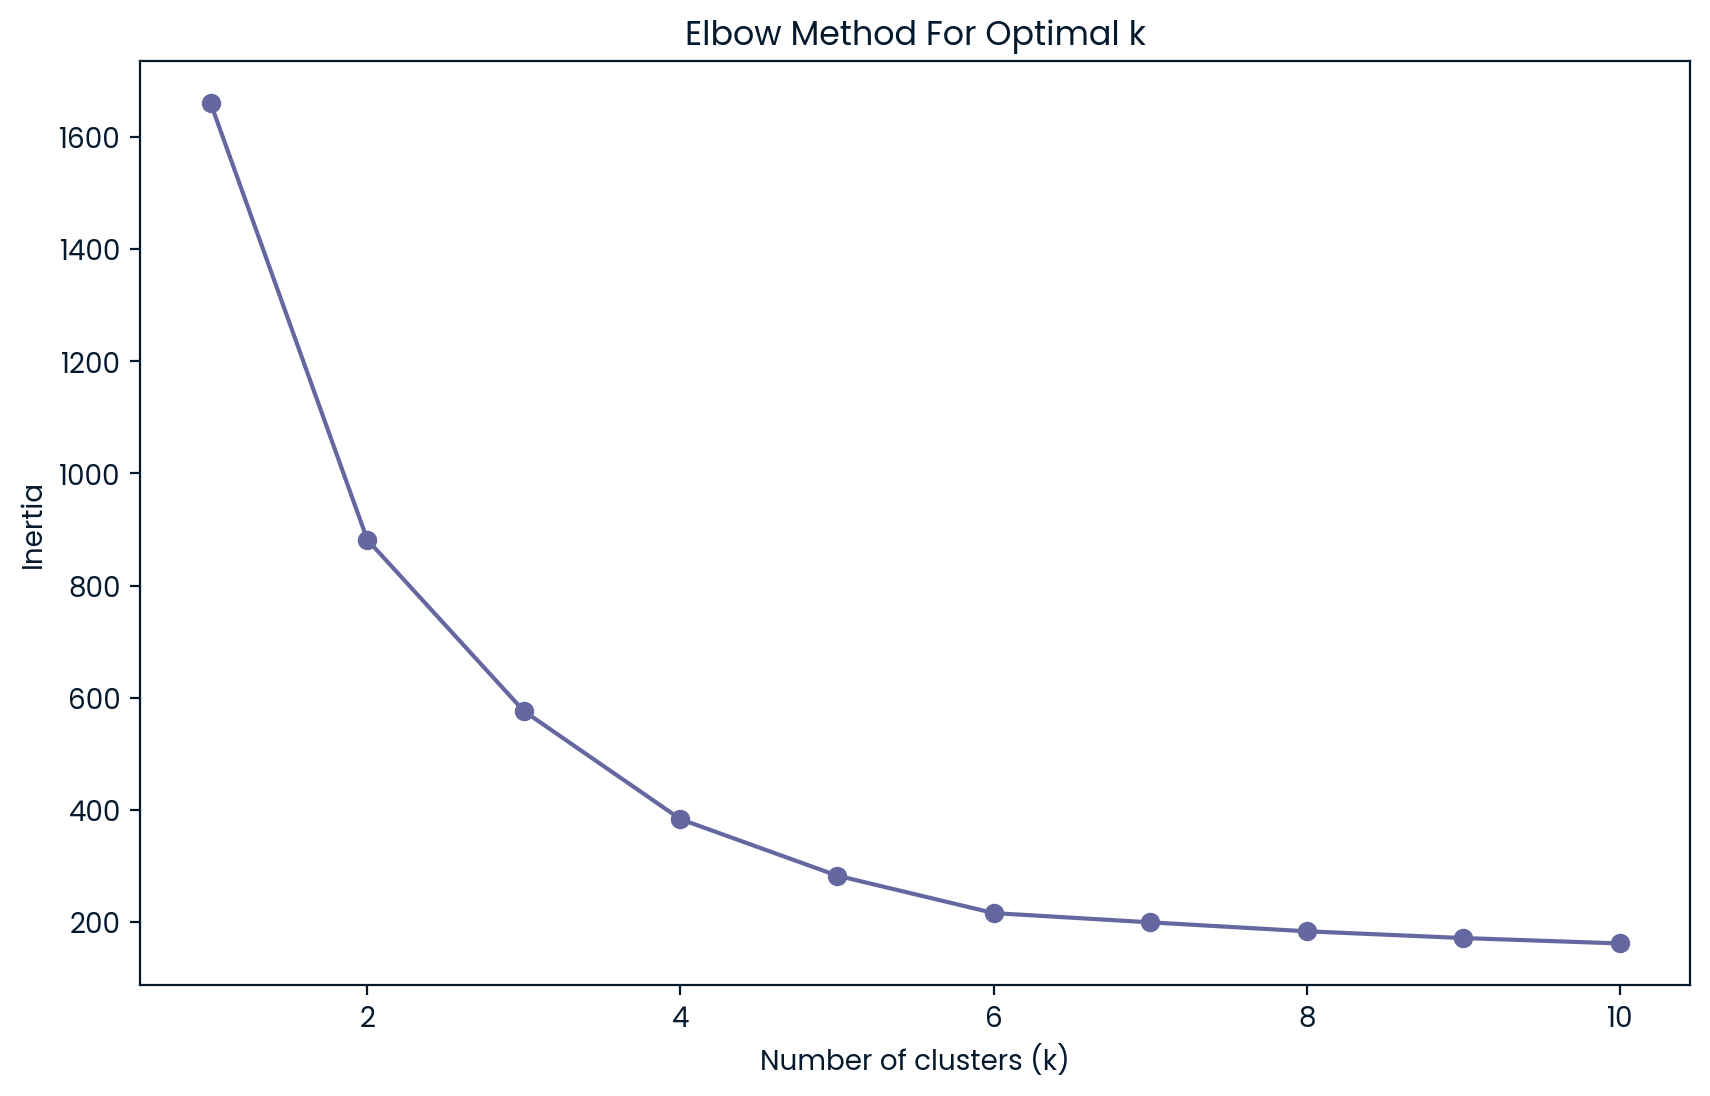

In [5]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determining the best k clusters
scores = []
for k in np.arange(1, 11):
    model = KMeans(n_clusters= k, random_state=42)
    model.fit(df_scaled)
    scores.append(model.inertia_)
    
# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

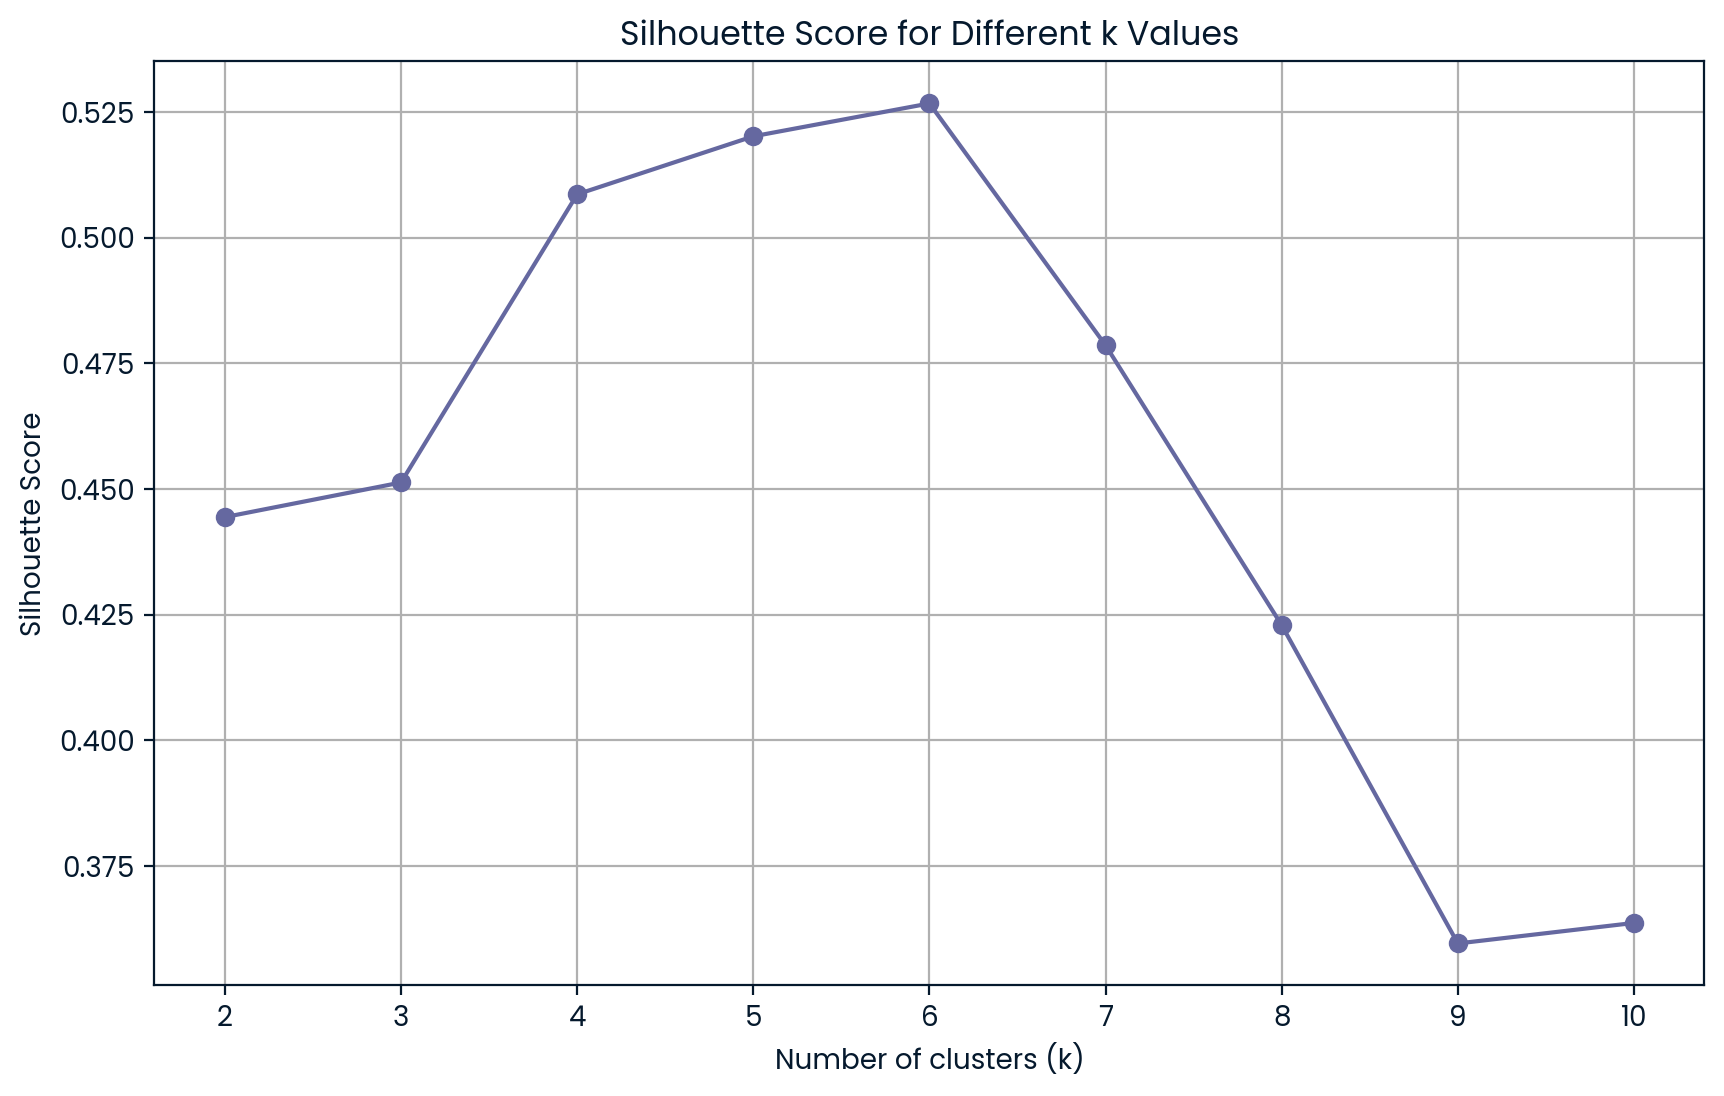

In [6]:
# Determine the best k using the silhouette score
silhouette_scores = []

for k in np.arange(2, 11):  # Start from 2 instead of 1
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o')  # Adjust x-axis range
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

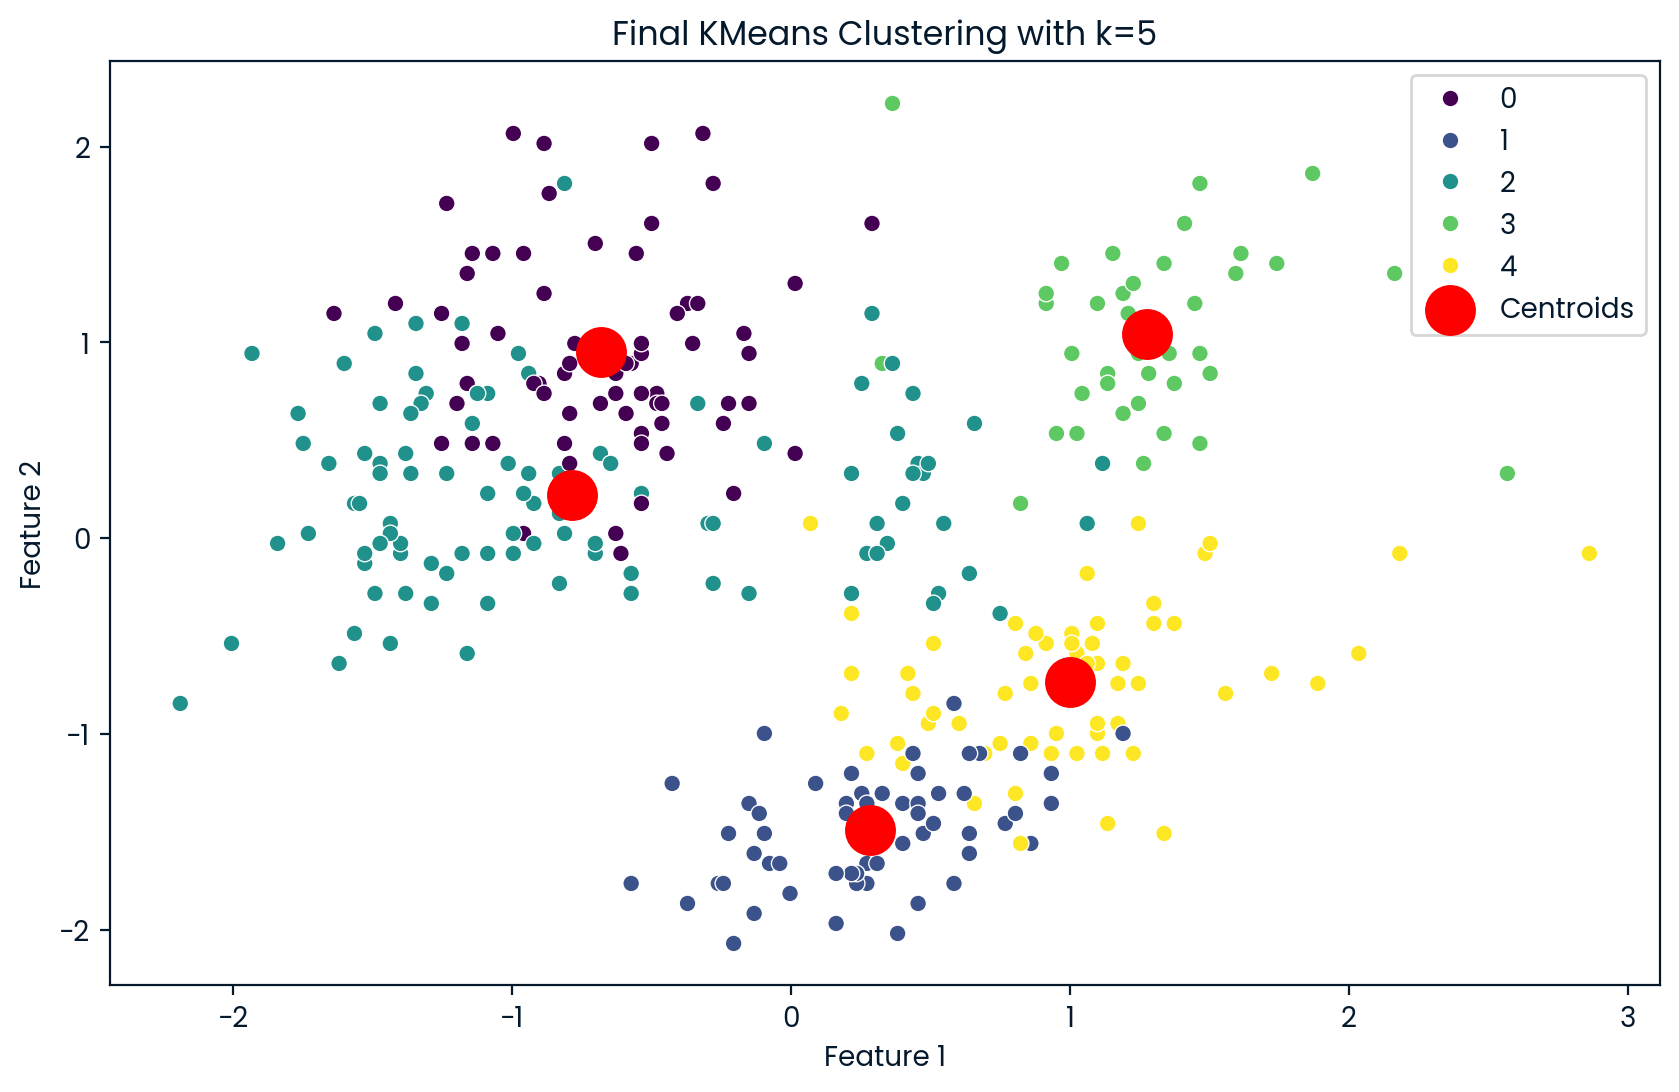

Silhouette Score: 0.520


In [7]:
# Final model with 5 clusters
model = KMeans(n_clusters=5, random_state=42)
labels = model.fit_predict(df_scaled)

# Visualizing the final clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=labels, palette='viridis', legend='full')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Final KMeans Clustering with k=5')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Caculating Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

In [8]:
stat_penguins = df.drop('sex', axis=1)
stat_penguins["Cluster"] = labels
stat_penguins = round(stat_penguins.groupby("Cluster").mean(),2)

# Display the final DataFrame
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
Cluster,,,,
0,40.32,19.01,192.24,4034.64
1,45.56,14.24,212.71,4679.74
2,39.74,17.59,188.86,3410.68
3,50.96,19.20,199.08,3920.62
4,49.47,15.72,221.54,5484.84


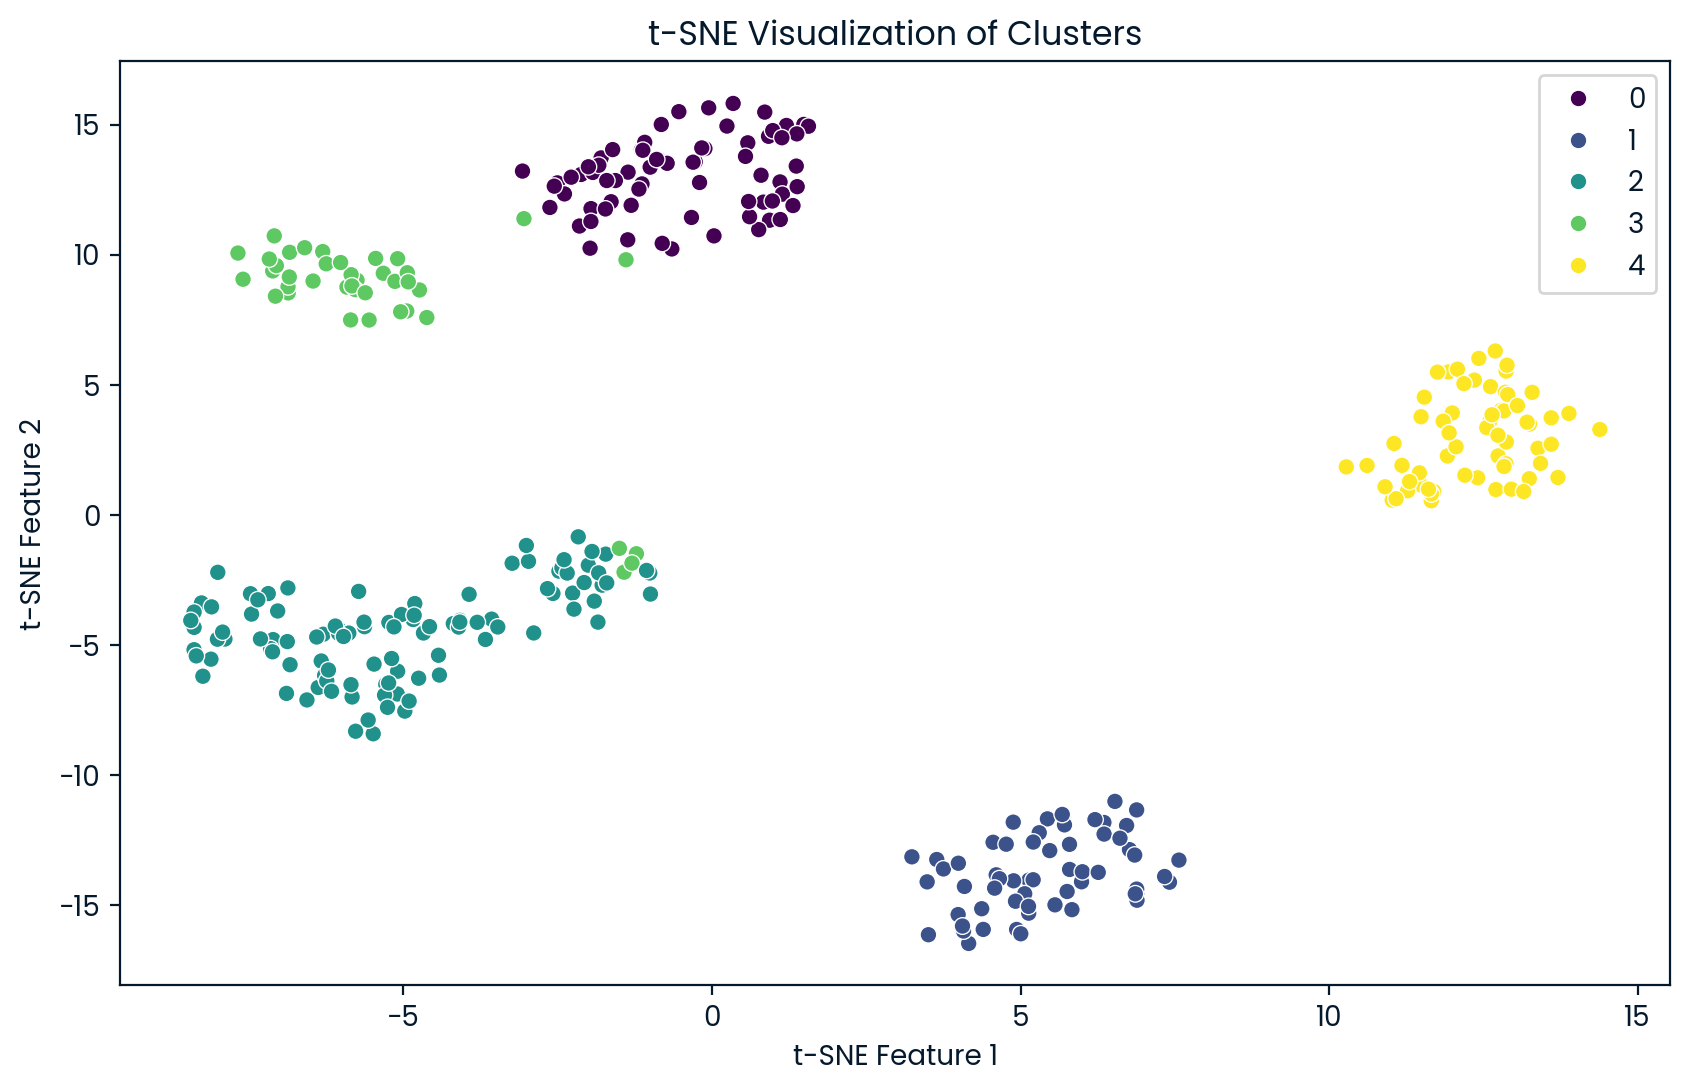

In [9]:
# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Visualizing the clusters with t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

In [10]:
# Get the centroid coordinates
centroids = model.cluster_centers_

abb= scaler.inverse_transform(model.cluster_centers_)

# Convert to DataFrame
centroid_df = pd.DataFrame(centroids[:,:4], columns= penguins_df.drop('sex', axis=1).columns) 
centroid1_df = pd.DataFrame(abb[:,:4], columns= penguins_df.drop('sex', axis=1).columns)  

print(centroid_df)
print(centroid1_df)

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.680603         0.949469          -0.623130    -0.213419
1          0.283365        -1.489322           0.837042     0.587801
2         -0.785495         0.222415          -0.864216    -0.988388
3          1.275460         1.043257          -0.135635    -0.355030
4          1.001551        -0.733134           1.467381     1.587737
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         40.315714        19.011429         192.242857  4034.642857
1         45.563793        14.237931         212.706897  4679.741379
2         39.744660        17.588350         188.864078  3410.679612
3         50.965000        19.195000         199.075000  3920.625000
4         49.473770        15.718033         221.540984  5484.836066


# Cluster Analysis Report

## Results
After performing a cluster analysis on the penguins dataset, the final model was determined to have **k = 5 clusters**, with a **silhouette score of 0.520**, indicating a reasonably well-defined clustering structure.

### Summary Statistics of Clusters:

| Cluster | Culmen Length (mm) | Culmen Depth (mm) | Flipper Length (mm) | Body Mass (g) |
|---------|--------------------|--------------------|----------------------|--------------|
| 0       | 40.32              | 19.01              | 192.24               | 4034.64      |
| 1       | 45.56              | 14.24              | 212.71               | 4679.74      |
| 2       | 39.74              | 17.59              | 188.86               | 3410.68      |
| 3       | 50.96              | 19.20              | 199.08               | 3920.62      |
| 4       | 49.47              | 15.72              | 221.54               | 5484.84      |

### Interpretation of Clusters:
- **Cluster 0**: Penguins with moderate culmen length and depth, average flipper length, and moderate body mass.
- **Cluster 1**: Penguins with the longest flippers and high body mass, but shallower culmen depth.
- **Cluster 2**: Penguins with the shortest flippers and lowest body mass, suggesting a smaller size category.
- **Cluster 3**: Penguins with the longest culmen length and moderate body mass.
- **Cluster 4**: Penguins with the highest body mass and long flippers, potentially the largest species in the dataset.

### Evaluation:
- The silhouette score of **0.520** indicates moderate cluster separation.
- Cluster centroids were analysed to understand the characteristics of each group.

## Conclusion
The k-means clustering model successfully identified **five distinct groups** of penguins based on culmen length, culmen depth, flipper length, and body mass. These clusters provide insights into different morphological patterns among the penguin population, which could be useful for further biological studies or conservation efforts. Further fine-tuning, such as incorporating additional features or testing hierarchical clustering, could improve segmentation clarity.

